In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', split='train', with_info=True)

# Parameters
BATCH_SIZE = 32
IMG_SIZE = 96  # Compromise between detail and speed
EPOCHS = 5

def preprocess_image(data):
    image = data['image']
    label = data['label']

    # Resize image to smaller dimensions
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
    # Normalize pixel values to [0,1]
    image = image / 255.0

    return image, label

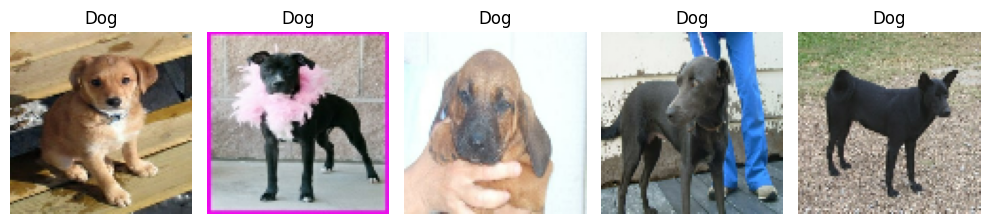

In [ ]:
DATASET_SIZE = info.splits['train'].num_examples
train_size = int(0.8 * DATASET_SIZE)
val_size = int(0.2 * DATASET_SIZE)

# Prepare dataset
dataset = dataset.map(preprocess_image)
dataset = dataset.shuffle(buffer_size=1000)
train_dataset = dataset.take(train_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_size).take(val_size).batch(BATCH_SIZE)

# Display a few samples
plt.figure(figsize=(10, 5))
for images, labels in train_dataset.take(1):
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(images[i])
        plt.title('Cat' if labels[i] == 0 else 'Dog')
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def build_model(input_shape):

    inputs = layers.Input(shape=input_shape)

    # First feature extraction block
    x = layers.Conv2D(32, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Second feature extraction block
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Third feature extraction block
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Classifier
    x = layers.Flatten()(x)
    x = layers.Dropout(0.5)(x)  # Add regularization to prevent overfitting
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    # Output layer
    outputs = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

# Create the model
model = build_model((IMG_SIZE, IMG_SIZE, 3))

# Display model architecture
model.summary()

# Compile model with binary cross-entropy (standard for binary classification)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 96, 96, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 96, 96, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 96, 96, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,453,697 (9.36 MB)

 Trainable params: 2,453,249 (9.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
callbacks = [
    keras.callbacks.EarlyStopping(
        patience=3,
        monitor='val_loss',
        restore_best_weights=True
    )
]

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 73s 92ms/step - accuracy: 0.5592 - loss: 1.0614 - val_accuracy: 0.6434 - val_loss: 0.6536
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 62s 106ms/step - accuracy: 0.6249 - loss: 0.6487 - val_accuracy: 0.6754 - val_loss: 0.6155
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 63s 106ms/step - accuracy: 0.6705 - loss: 0.6092 - val_accuracy: 0.7524 - val_loss: 0.5624
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 61s 71ms/step - accuracy: 0.6999 - loss: 0.5799 - val_accuracy: 0.7934 - val_loss: 0.5029
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 44s 75ms/step - accuracy: 0.7122 - loss: 0.5609 - val_accuracy: 0.7616 - val_loss: 0.5176


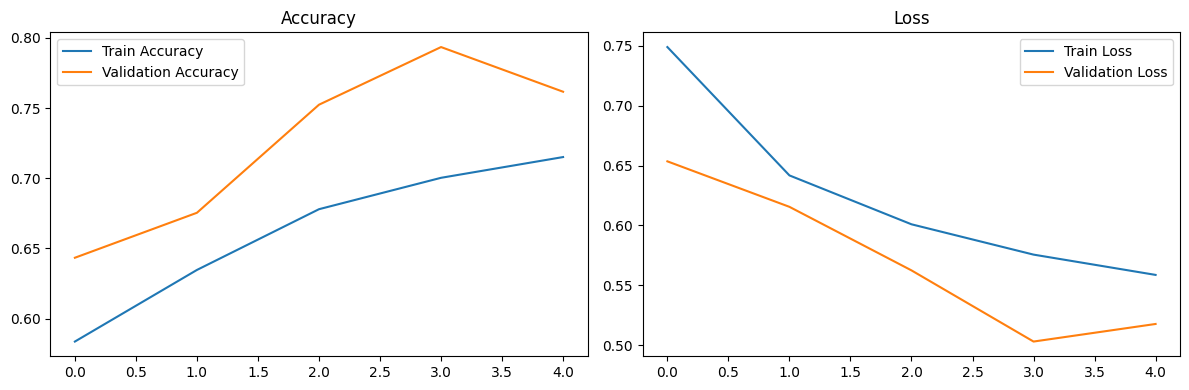

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


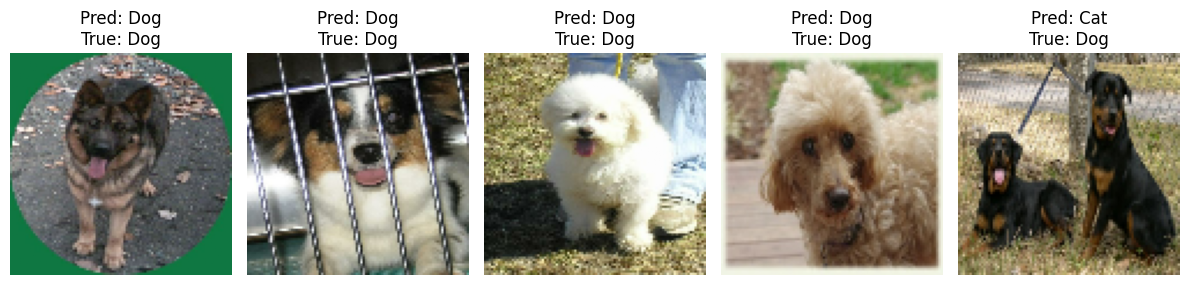

In [ ]:
for images, labels in validation_dataset.take(1):
    sample_images = images[:5]
    sample_labels = labels[:5]
    predictions = model.predict(sample_images)

    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(sample_images[i])
        pred_class = "Dog" if predictions[i] > 0.5 else "Cat"
        true_class = "Dog" if sample_labels[i] == 1 else "Cat"
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━

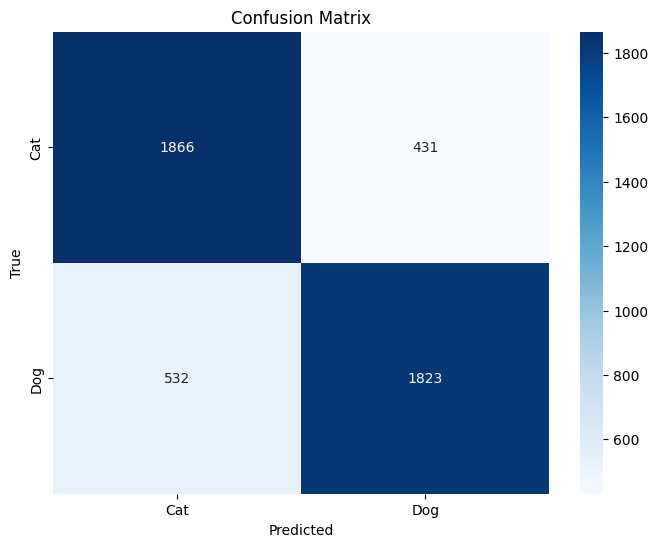


--- Summary Metrics ---
Accuracy: 0.7930
Precision: 0.8088
Recall: 0.7741
F1 Score: 0.7911


In [ ]:
# Generate predictions and actual labels for the entire validation set
y_pred = []
y_true = []

for images, labels in validation_dataset:
    # Predict and convert to binary class (0 or 1)
    predictions = model.predict(images)
    pred_classes = (predictions > 0.5).astype(int).flatten()

    # Append batch predictions and true labels
    y_pred.extend(pred_classes)
    y_true.extend(labels.numpy())

# Convert to numpy arrays
y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Import necessary metrics from sklearn
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import seaborn as sns # Import seaborn for heatmap plotting

# Generate and print classification report
class_names = ['Cat', 'Dog']
print("\n--- Classification Report ---")
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)

# Generate and plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate additional metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"\n--- Summary Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 79.30%


In [ ]:
import pickle

with open("A01665895_image_classifier.pkl", "wb") as model_file:
    pickle.dump(model, model_file)